<a href="https://colab.research.google.com/github/Paulsob/TelecomLabs/blob/main/Lab8_telecom_1_fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Пункт 1

In [ ]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
import numpy as np
import scipy
import matplotlib.pyplot as plt
from thinkdsp import TriangleSignal
from thinkdsp import decorate

In [ ]:
boxcar = np.ones(11)
boxcar /= sum(boxcar)

In [ ]:
gaussian = scipy.signal.windows.gaussian(M=11, std=2)
gaussian /= sum(gaussian)

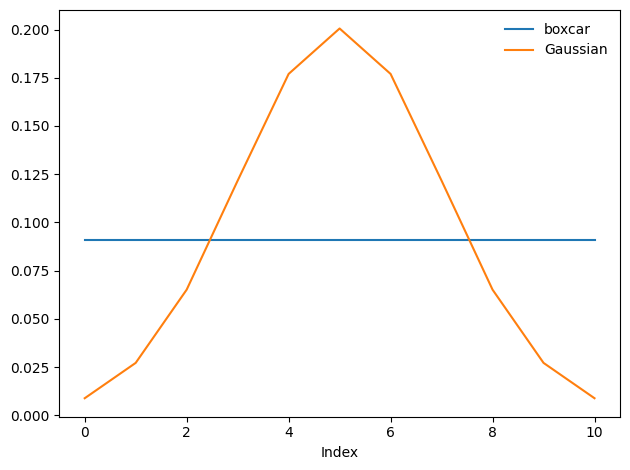

In [ ]:
plt.plot(boxcar, label='boxcar')
plt.plot(gaussian, label='Gaussian')
decorate(xlabel='Index')

In [ ]:
from thinkdsp import SawtoothSignal

signal = SawtoothSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)
wave.make_audio()

from thinkdsp import Wave

In [ ]:
ys = np.convolve(wave.ys, gaussian, mode='same')
smooth = Wave(ys, framerate=wave.framerate)
spectrum2 = smooth.make_spectrum()

In [ ]:
spectrum = wave.make_spectrum()

In [ ]:
amps = spectrum.amps
amps2 = spectrum2.amps
ratio = amps2 / amps
ratio[amps<560] = 0

In [ ]:
def zero_pad(array, n):
    """Extends an array with zeros.

    array: NumPy array
    n: length of result

    returns: new NumPy array
    """
    res = np.zeros(n)
    res[:len(array)] = array
    return res

In [ ]:
padded =  zero_pad(gaussian, len(wave))
dft_gaussian = np.fft.rfft(padded)

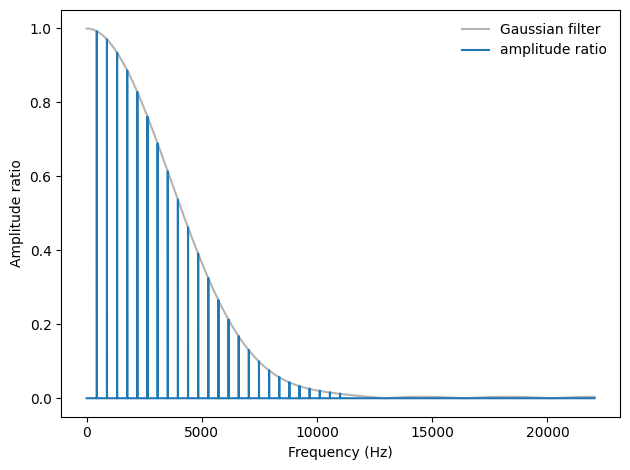

In [ ]:
plt.plot(np.abs(dft_gaussian), color='0.7', label='Gaussian filter')
plt.plot(ratio, label='amplitude ratio')

decorate(xlabel='Frequency (Hz)', ylabel='Amplitude ratio')

In [ ]:
from thinkdsp import SquareSignal

def plot_filter(M=11, std=2):
    signal = SquareSignal(freq=440)
    wave = signal.make_wave(duration=1, framerate=44100)
    spectrum = wave.make_spectrum()

    gaussian = scipy.signal.windows.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)

    ys = np.convolve(wave.ys, gaussian, mode='same')
    smooth =  Wave(ys, framerate=wave.framerate)
    spectrum2 = smooth.make_spectrum()

    # plot the ratio of the original and smoothed spectrum
    amps = spectrum.amps
    amps2 = spectrum2.amps
    ratio = amps2 / amps
    ratio[amps<560] = 0

    # plot the same ratio along with the FFT of the window
    padded =  zero_pad(gaussian, len(wave))
    dft_gaussian = np.fft.rfft(padded)

    plt.plot(np.abs(dft_gaussian), color='gray', label='Gaussian filter')
    plt.plot(ratio, label='amplitude ratio')

    decorate(xlabel='Frequency (Hz)', ylabel='Amplitude ratio')
    plt.show()

In [ ]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.IntSlider(min=2, max=100, value=11)
slider2 = widgets.FloatSlider(min=0, max=20, value=2)
interact(plot_filter, M=slider, std=slider2);

interactive(children=(IntSlider(value=11, description='M', min=2), FloatSlider(value=2.0, description='std', m…

Вопрос:

Что произойдёт, если при увеличении ширины гауссова окна std не увеличивать число элементов в окне M?

Ответ:

Если увеличивать std, не увеличивая размер окна M, значительная часть гауссовой функции будет «обрезана» краями окна. Это приведёт к тому, что окно перестанет быть гладким и симметричным, и могут появиться артефакты в спектре (например, боковые лепестки усилятся), поскольку с точки зрения частотного анализа окно уже не будет напоминать настоящее гауссово.

Таким образом, для сохранения корректной формы и свойств окна при увеличении std следует пропорционально увеличивать M.

Пункт 2

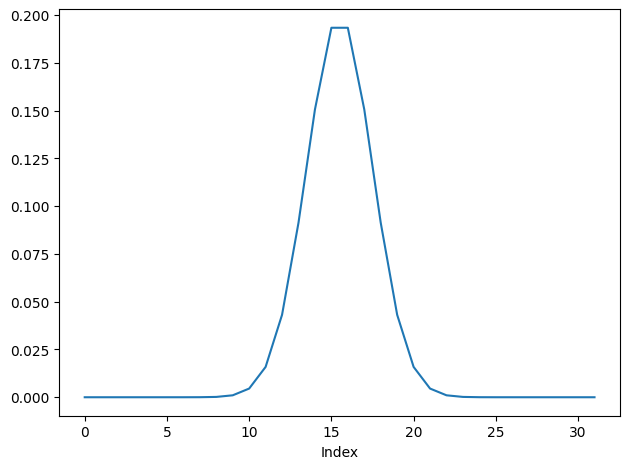

In [ ]:
from scipy.signal.windows import gaussian as g

gaussian = g(M=32, std=2)
gaussian /= sum(gaussian)
plt.plot(gaussian)
decorate(xlabel='Index')

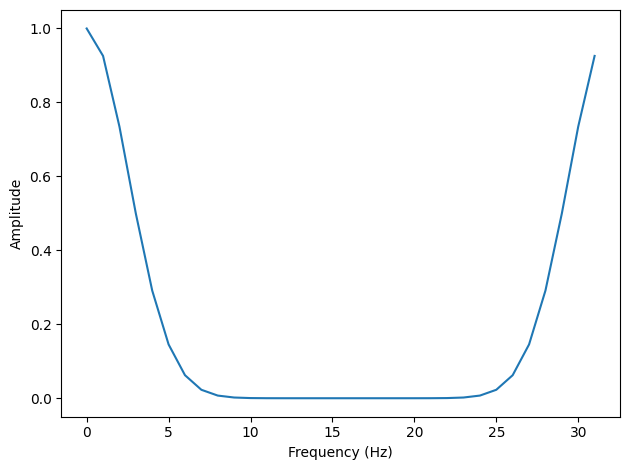

In [ ]:
fft_gaussian = np.fft.fft(gaussian)
plt.plot(abs(fft_gaussian))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

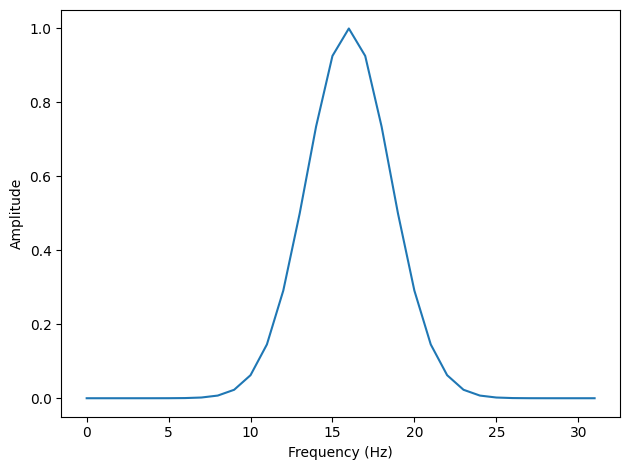

In [ ]:
N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
plt.plot(abs(fft_rolled))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

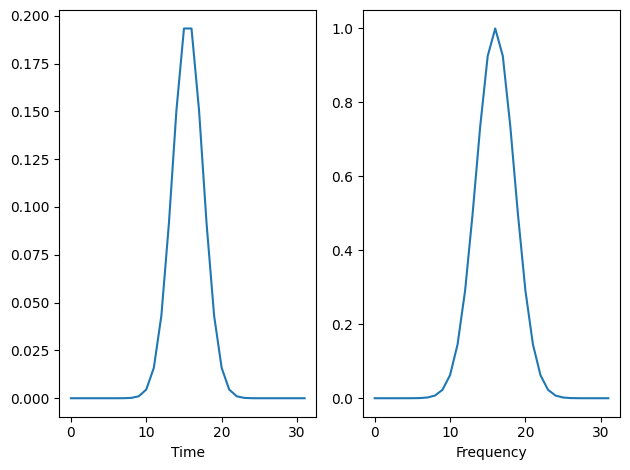

In [ ]:
def plot_gaussian(std):

    M = 32
    gaussian = g(M=M, std=std)
    gaussian /= sum(gaussian)

    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Time')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)

    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Frequency')
    plt.show()

plot_gaussian(2)

In [ ]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider);

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

Пункт 3

In [ ]:
from thinkdsp import SquareSignal

signal = SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)

In [ ]:
M = 15
std = 2.5

gaussian = g(M=M, std=std)
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [blackman, gaussian, hanning, hamming]
names = ['blackman', 'gaussian', 'hanning', 'hamming']

for window in windows:
    window /= sum(window)

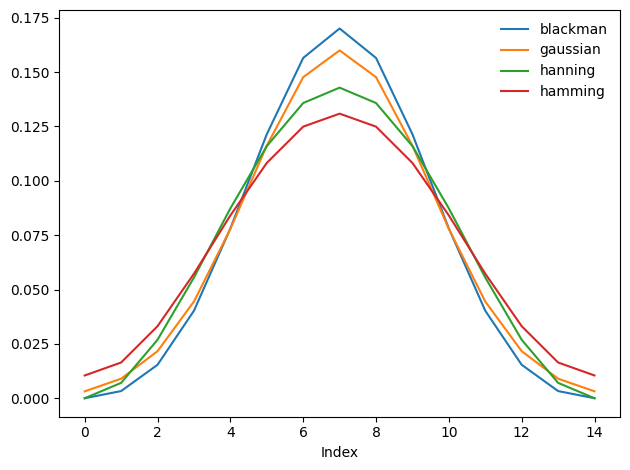

In [ ]:
for window, name in zip(windows, names):
    plt.plot(window, label=name)

decorate(xlabel='Index')

In [ ]:
def plot_window_dfts(windows, names):
    """
    """
    for window, name in zip(windows, names):
        padded =  zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)

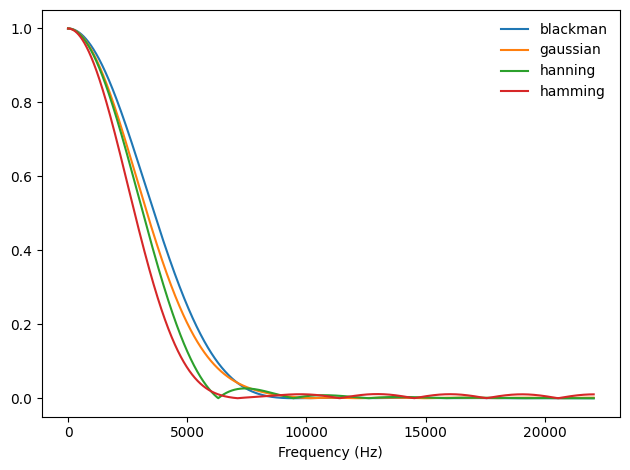

In [ ]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)')

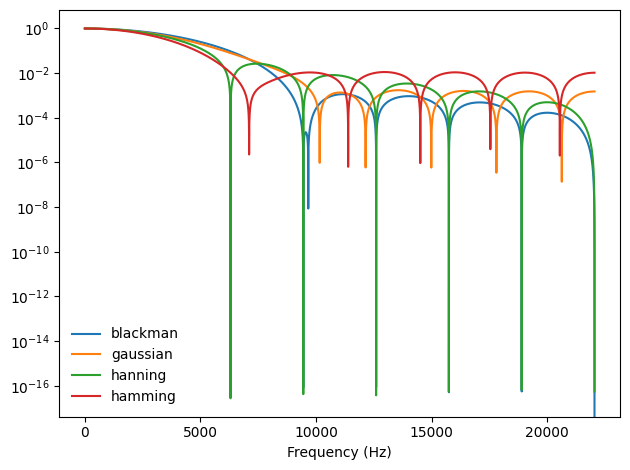

In [ ]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)', yscale='log')